In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

In [3]:
def potential(r,theta,iteraciones):
    phi0 = 1.0
    a = 2.0
    b = 3.0
    phi = (1.0/2.0)*phi0
    for j in range(1,iteraciones):
        p1 = ((a/b)**(2*j-1)+1)*(a/r)**(2*j)-((a/b)**(2*j)+1)*(r/b)**(2*j-1)
        p2 = (4*j-1)/(1-(a/b)**(4*j-1))
        p3 = (quad(lambda x: legendre(2*j-1)(x), 0, 1))[0]
        p4 = legendre(2*j-1)(np.cos(theta))
        phi += (1.0/2.0)*phi0*p1*p2*p3*p4
    return phi

In [10]:
def generate_plot_(j):
    """Analytical solution to concentric spherical shells problem.
    j = 1,2,3,... is a number such that l = 2j-1, where l denotes the degree of
    a Legendre polynomial
        """
    # Create the mesh in polar coordinates and compute corresponding Z.
    r = np.linspace(2, 3, 50)
    p = np.linspace(0, np.pi, 50)
    R, P = np.meshgrid(r, p)
    Z = potential(R,P,j)

    # Express the mesh in the cartesian system.
    X, Y = R*np.cos(P), R*np.sin(P)

    levels = np.linspace(Z.min(), 
                        Z.max(), 
                        30)
    # Plot the surface.
    plt.contourf(Y, X, Z, levels, cmap='coolwarm')
    plt.contourf(-Y, X, Z, levels, cmap='coolwarm')
    # Customize the z axis.
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.

    plt.colorbar(label=r"$\phi(r,\theta)[V]$")
    plt.xlabel(r'$y[m]$',fontsize=10)
    plt.ylabel(r'$z[m]$',fontsize=10)
    plt.title(r'$\phi(r,\theta)$ con $j=$'+'{}'.format(j),fontsize=10)
    plt.axis('equal')
    #plt.savefig('PotencialLegendre4.png')
    plt.show();

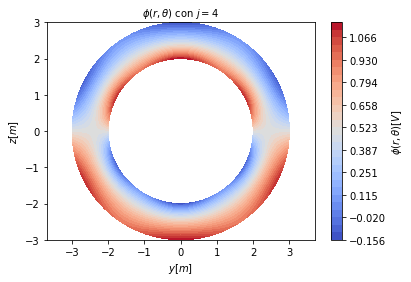

In [11]:
generate_plot_(j=4)

C:\Users\beatl\AppData\Roaming\Python\Python38\site-packages\scipy\special\_orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))


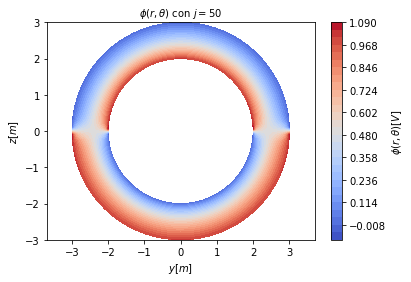

In [12]:
generate_plot_(j=50)

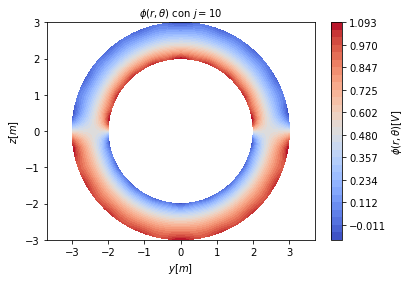

In [13]:
generate_plot_(j=10)

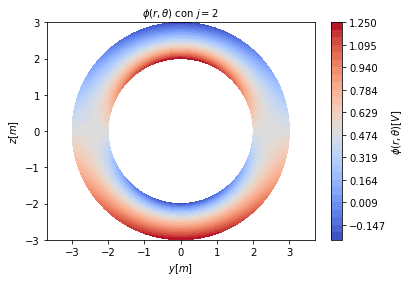

In [14]:
generate_plot_(j=2)